In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install qiskit

# How the Bloch sphere looks like.

Also, you can benefit from a cool visualization at https://javafxpert.github.io/grok-bloch/
These are simple pure $|0\rangle$ and superposed $|+\rangle$ states.

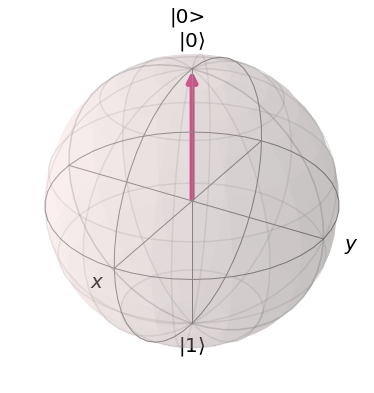

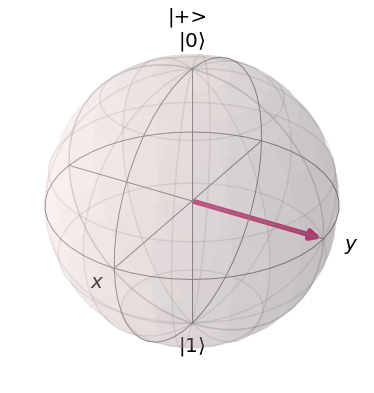

In [2]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector

x, y, z = 0, 0, 1
plot_bloch_vector([x, y, z], title="|0>")
plt.show()
x, y, z = 0, 1, 0
plot_bloch_vector([x, y, z], title="|+>")
plt.show()  # this is to avoid duplication

## State vector representation

There are multiple visualization ways, please refer to [draw() documentation]( https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.draw.html#qiskit.quantum_info.Statevector.draw)

<IPython.core.display.Latex object>

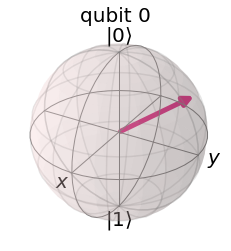

array([0.63337166, 0.36662834])

In [3]:
import qiskit
sv = qiskit.quantum_info.random_statevector(2)
display(sv.draw(output='latex'))
sv.draw(output='bloch')
plt.show()

sv.probabilities()

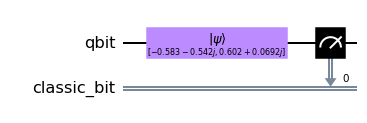

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# define a quantum register with a single qubit
q = QuantumRegister(1, "qbit")

# define a classical register with a single bit
c = ClassicalRegister(1, "classic_bit")

# prepare a circuit
qc = QuantumCircuit(q,c)

from qiskit.extensions.quantum_initializer import initializer
# initialize a qubit in a given state. Any other options?
initializer.initialize(qc, sv)

# measure the state
qc.measure(0, 0)
qc.draw(output='mpl')
plt.show()

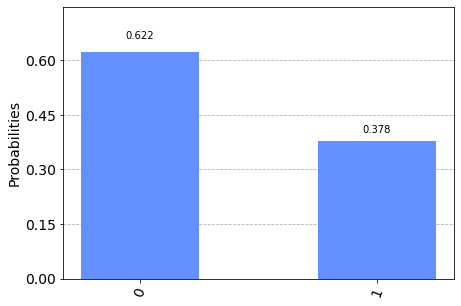

In [5]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

# TODO
Using this documentation of [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) class, prepare $|1\rangle, |+\rangle,$, and $e^{\frac{i\pi}{3}}|+\rangle$ states. Visualize them in Boch sphere and use simulator to validate their probabilities.